In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

import pandas as pd

In [ ]:
data=pd.read_csv("/content/Complete_merged.csv",header= 0,encoding='ISO-8859–1')
data.head()

,location,text,hashtags
0,NaN,russian artillery entered a battle with McDona...,[]
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']"
2,NaN,1.) You are embedded with the âKrakenâ win...,[]
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[]
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']"


In [ ]:
#data cleaning for vader

import re

import numpy as np
import matplotlib.pyplot as plt
import time

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")

     
    return tweets

In [ ]:
data['text_vader'] = clean_tweets(data['text'])

In [ ]:
data['text_vader'][1]

'Shades of grey #War #MausMusings #Kharkiv #Ukraine '

In [ ]:
#Text cleaning for Textblob and flair

import string
# import nltk
# from nltk.corpus import stopwords
# nltk.download("stopwords")
# stop_words = set(stopwords.words("english"))
# stemmer = nltk.SnowballStemmer("english")


#converted tweets to lower case
data['preprocess_data'] = data['text'].str.lower()

#url removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'(https|http)?:\/(\w|\.|\/|\?|\=|\&|\%)*\b','')
data['preprocess_data'] = data['preprocess_data'].str.replace(r'www\.\S+\.com','')

#removed retweets & cc
data['preprocess_data'] = data['preprocess_data'].str.replace(r'rt|cc', '')

#hashtags removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'#\S+', '')

#user mentioned removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'@\S+', '')

#emoji removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'[^\x00-\x7F]+', '')

#html tags
data['preprocess_data'] = data['preprocess_data'].str.replace(r'<.*?>', '')

#removed extra spaces
data['preprocess_data'] = data['preprocess_data'].str.replace(r' +', ' ')

#punctuation replaced
data['preprocess_data'] = data['preprocess_data'].str.replace('[{}]'.format(string.punctuation), '')

data['preprocess_data'] = data['preprocess_data'].fillna('')

data['preprocess_data'] = data['preprocess_data'].str.replace('\n', '') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to Fals

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(data['text_vader'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(data['text_vader'][i])["compound"]
    pos = analyzer.polarity_scores(data['text_vader'][i])["pos"]
    neu = analyzer.polarity_scores(data['text_vader'][i])["neu"]
    neg = analyzer.polarity_scores(data['text_vader'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)

data = data.join(sentiments_score, how = 'left')
data.head()

,location,text,hashtags,text_vader,preprocess_data,Compound,Positive,Negative,Neutral
0,NaN,russian artillery entered a battle with McDona...,[],russian artillery entered a battle with McDona...,russian aillery entered a battle with mcdonald...,-0.8020,0.000,0.427,0.573
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",Shades of grey #War #MausMusings #Kharkiv #Ukr...,shades of grey,-0.5719,0.119,0.386,0.495
2,NaN,1.) You are embedded with the âKrakenâ win...,[],1.) You are embedded with the âKrakenâ win...,1 you are embedded with the kraken wing of azo...,0.1280,0.122,0.092,0.786
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],"In Kharkiv, after shelling in Saltivka, two hi...",in kharkiv after shelling in saltivka two high...,-0.0772,0.093,0.107,0.800
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",The activities carried out by the United State...,the activities carried out by the united state...,-0.0772,0.067,0.074,0.859


In [ ]:
#labeling the tweet sentiment as per Vader scores
def analyse_sentiment(compound_score):
  if compound_score >= 0.05:
    return "Positive"
  elif compound_score <= -0.05:
    return "Negative"
  else: 
    return "Neutral"

In [ ]:
data['label_vader'] = data['Compound'].apply(analyse_sentiment)

data.head()

,location,text,hashtags,text_vader,preprocess_data,Compound,Positive,Negative,Neutral,label_vader
0,NaN,russian artillery entered a battle with McDona...,[],russian artillery entered a battle with McDona...,russian aillery entered a battle with mcdonald...,-0.8020,0.000,0.427,0.573,Negative
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",Shades of grey #War #MausMusings #Kharkiv #Ukr...,shades of grey,-0.5719,0.119,0.386,0.495,Negative
2,NaN,1.) You are embedded with the âKrakenâ win...,[],1.) You are embedded with the âKrakenâ win...,1 you are embedded with the kraken wing of azo...,0.1280,0.122,0.092,0.786,Positive
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],"In Kharkiv, after shelling in Saltivka, two hi...",in kharkiv after shelling in saltivka two high...,-0.0772,0.093,0.107,0.800,Negative
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",The activities carried out by the United State...,the activities carried out by the united state...,-0.0772,0.067,0.074,0.859,Negative


In [ ]:
!pip install flair

     |████████████████████████████████| 401 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 83.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 19.7 MB 32.6 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 77 kB 7.5 MB/s 
     |████████████████████████████████| 48 kB 6.8 MB/s 
     |████████████████████████████████| 981 kB 46.3 MB/s 
     |████████████████████████████████| 1.2 MB 61.3 MB/s 
     |████████████████████████████████| 4.0 MB 75.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 788 kB 78.8 MB/s 
     |████████████████████████████████| 199 kB 88.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 80.1 MB/s 
     |████████████████████████████████| 880 kB 68.0 MB/s 
     |████████

In [ ]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
sia = TextClassifier.load('en-sentiment')

def flair_prediction(x):
  sentence = Sentence(x)
  sia.predict(sentence)
  try:
    score = sentence.labels[0]  
    if "POSITIVE" in str(score):
      return "Positive"
    elif "NEGATIVE" in str(score):
      return "Negative"
    else:
      return "Neutral"
  except:
    return 'NA'

2022-05-07 21:46:57,429 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpft8tsjil


100%|██████████| 265512723/265512723 [00:10<00:00, 24209807.03B/s]

2022-05-07 21:47:08,759 copying /tmp/tmpft8tsjil to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-05-07 21:47:09,081 removing temp file /tmp/tmpft8tsjil
2022-05-07 21:47:09,111 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
a = flair_prediction("Shades of grey")
print(a)

Negative


In [ ]:

data['flair_label']= ''
data.head()

,location,text,hashtags,text_vader,preprocess_data,Compound,Positive,Negative,Neutral,label_vader,flair_label
0,NaN,russian artillery entered a battle with McDona...,[],russian artillery entered a battle with McDona...,russian aillery entered a battle with mcdonald...,-0.8020,0.000,0.427,0.573,Negative,
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",Shades of grey #War #MausMusings #Kharkiv #Ukr...,shades of grey,-0.5719,0.119,0.386,0.495,Negative,
2,NaN,1.) You are embedded with the âKrakenâ win...,[],1.) You are embedded with the âKrakenâ win...,1 you are embedded with the kraken wing of azo...,0.1280,0.122,0.092,0.786,Positive,
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],"In Kharkiv, after shelling in Saltivka, two hi...",in kharkiv after shelling in saltivka two high...,-0.0772,0.093,0.107,0.800,Negative,
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",The activities carried out by the United State...,the activities carried out by the united state...,-0.0772,0.067,0.074,0.859,Negative,


In [ ]:
for i in range (len(data['preprocess_data'])):
  # print(i)
  data['flair_label'][i]= flair_prediction(data['preprocess_data'][i])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2022-05-07 21:57:26,268 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-07 21:58:14,761 Warning: An empty Sentence was created! Are there empty strings in your dataset?


In [ ]:
x = data['preprocess_data'][8801]
y = flair_prediction(x)
print(y)

NA


In [ ]:
#Sentiment Analysis using TextBlob

from textblob import TextBlob
# Add polarities and subkectivities into the DataFrame by using TextBlob
data["Polarity"] = data["preprocess_data"].apply(lambda word: TextBlob(str(word)).sentiment.polarity)

data["Subjectivity"] = data["preprocess_data"].apply(lambda word: TextBlob(str(word)).sentiment.subjectivity)

# Display the Polarity and Subjectivity columns
display(data[["Polarity","Subjectivity"]].head(10))

,Polarity,Subjectivity
0,0.000000,0.000000
1,-0.050000,0.100000
2,0.000000,0.000000
3,0.000000,0.000000
4,-0.350000,0.500000
5,0.073333,0.086667
6,0.000000,0.000000
7,0.073333,0.086667
8,0.073333,0.086667
9,0.000000,0.000000


In [ ]:
# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
data["Polarity Scores"] = data["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(data[["Polarity Scores"]].head(10))

,Polarity Scores
0,Neutral
1,Negative
2,Neutral
3,Neutral
4,Negative
5,Positive
6,Neutral
7,Positive
8,Positive
9,Neutral


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Vader labels')

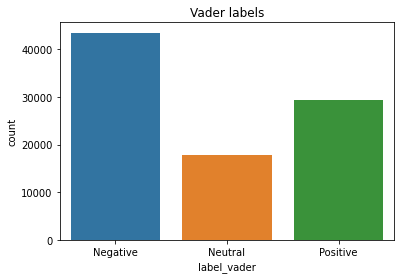

Text(0.5, 1.0, 'TextBlob labels')

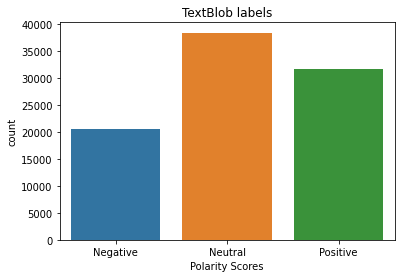

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data["label_vader"] = data["label_vader"].astype("category")
# Visualize the Label counts
sns.countplot(data["label_vader"])
plt.title("Vader labels")
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
data["Polarity Scores"] = data["Polarity Scores"].astype("category")
# Visualize the Label counts
sns.countplot(data["Polarity Scores"])
plt.title("TextBlob labels")
plt.show()

In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=d3ff7c5c50be3de7a55a93dd07676255db014dc3e4774c44164e9c7318828f37
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
#Code to identify countries from locations for each tweet
import pycountry

def get_countries(location):
    
    # If location is a country name return its alpha2 code
    try:
      if pycountry.countries.get(name= location):
        return pycountry.countries.get(name = location).alpha_2

    except:
      pass
    
    # If location is a subdivisions name return the countries alpha2 code
    try:
        pycountry.subdivisions.lookup(location)
        return pycountry.subdivisions.lookup(location).country_code
    except:
        # If the location is neither country nor subdivision return the "unknown" tag
        return "unknown"

# Call the function and store the country codes in the Country column
data["Country"] = data["location"].apply(get_countries)

# Print the unique values
print(data["Country"].unique())

# Print the number of unique values
print("Number of unique values:",len(data["Country"].unique()))

['unknown' 'IN' 'LU' 'YE' 'DE' 'GB' 'PT' 'UA' 'AU' 'LR' 'HU' 'US' 'LT'
 'TH' 'ES' 'NG' 'FR' 'EE' 'SI' 'IT' 'PL' 'JP' 'CU' 'HK' 'CA' 'SE' 'ZA'
 'TW' 'IE' 'LV' 'IQ' 'KG' 'FI' 'NZ' 'MX' 'AT' 'RO' 'CO' 'DK' 'GR' 'SK'
 'AR' 'GE' 'PA' 'UG' 'BG' 'PK' 'CL' 'ID' 'PR' 'MC' 'IM' 'PH' 'TR' 'AE'
 'ZW' 'NO' 'BA' 'LK' 'CH' 'JM' 'LB' 'MA' 'GH' 'NL' 'NP' 'BB' 'SA' 'RS'
 'ET' 'TN' 'PS' 'GN' 'EG' 'EC' 'SG' 'MW' 'GI' 'DZ' 'NA' 'KE' 'HR' 'AD'
 'MM' 'MY' 'BE' 'JO' 'SD' 'AZ' 'UY' 'MZ' 'MT' 'BR' 'PE' 'GT' 'CM' 'BD'
 'KW' 'CY' 'MQ' 'IS' 'CZ' 'KZ' 'SO' 'GM' 'DJ' 'CN' 'HT' 'CR' 'BW' 'KY'
 'IL' 'BS' 'AL' 'KH' 'NI' 'BY' 'BF' 'DO' 'GL' 'AQ' 'JE' 'SV' 'SC']
Number of unique values: 124


Check this: IN    763
UA    748
US    612
GB    209
CA    135
DE    126
AU     93
IT     70
FR     68
BD     56
AR     56
IE     55
ET     50
JP     43
PH     42
ES     39
EE     37
FI     36
PK     36
CH     34
Name: Country, dtype: int64 ['India', 'Ukraine', 'United States', 'United Kingdom', 'Canada', 'Germany', 'Australia', 'Italy', 'France', 'Bangladesh', 'Argentina', 'Ireland', 'Ethiopia', 'Japan', 'Philippines', 'Spain', 'Estonia', 'Finland', 'Pakistan', 'Switzerland']


<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Tweet count')

Text(0.5, 1.0, 'Top 20 Countries')

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text major ticklabel objects>)

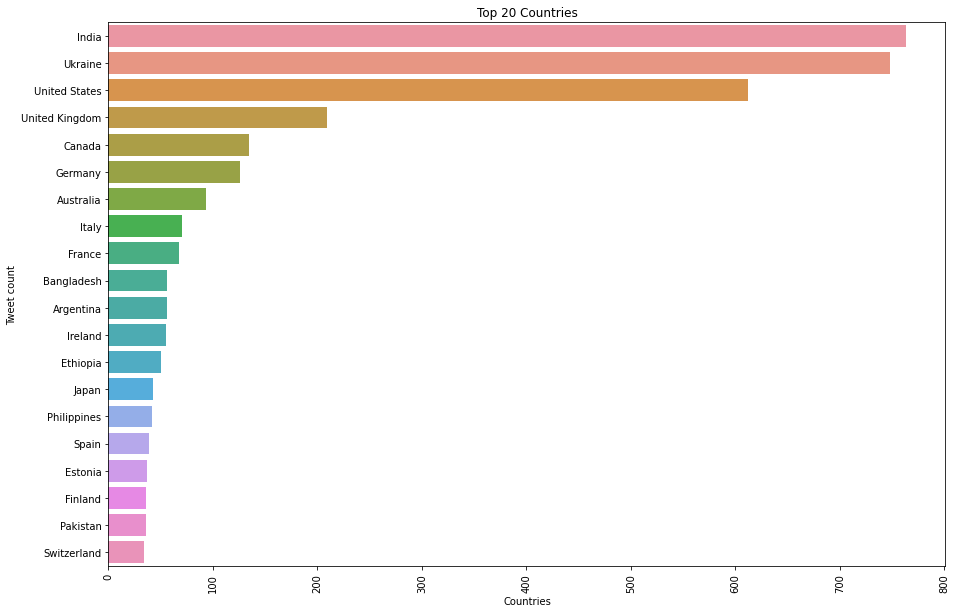

In [ ]:
#visulaising top 20 countries
from collections import Counter
import seaborn as sns

countries = data[data.Country!='unknown']

# Select the top 20 countries
top_countries = countries["Country"].value_counts(sort=True).head(20)

# Convert alpha2 country codes to country names and store in a list
country_fullnames = []
for alpha2 in top_countries.index:
    country_fullnames.append(pycountry.countries.get(alpha_2=alpha2).name)


print("Check this:", top_countries, country_fullnames)
# Visualize the top 20 countries
plt.figure(figsize=(15,10))
sns.barplot(x= top_countries,y=country_fullnames)

plt.xlabel("Countries")
plt.ylabel("Tweet count")
plt.title("Top 20 Countries")
plt.xticks(rotation=90)
plt.show()

Positive 

Country
IN    503
UA    391
US    244
GB     90
CA     61
     ... 
BY      1
BW      1
AL      1
AD      1
ZW      1
Name: Country, Length: 103, dtype: int64

Negative

Country
US    259
UA    227
IN    140
GB     78
DE     51
     ... 
CY      1
CM      1
BS      1
BD      1
UG      1
Name: Country, Length: 99, dtype: int64


<Figure size 864x720 with 0 Axes>

Text(0.5, 0, 'Countries')

([<matplotlib.axis.XTick at 0x7f6bdd0a3b50>,
 [Text(0, 0, 'India'),
  Text(0, 0, 'Ukraine'),
  Text(0, 0, 'United States'),
  Text(0, 0, 'United Kingdom'),
  Text(0, 0, 'Canada'),
  Text(0, 0, 'Germany'),
  Text(0, 0, 'Australia'),
  Text(0, 0, 'Italy'),
  Text(0, 0, 'France'),
  Text(0, 0, 'Bangladesh')])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Tweet count')

Text(0.5, 1.0, 'Top 10 Countries')

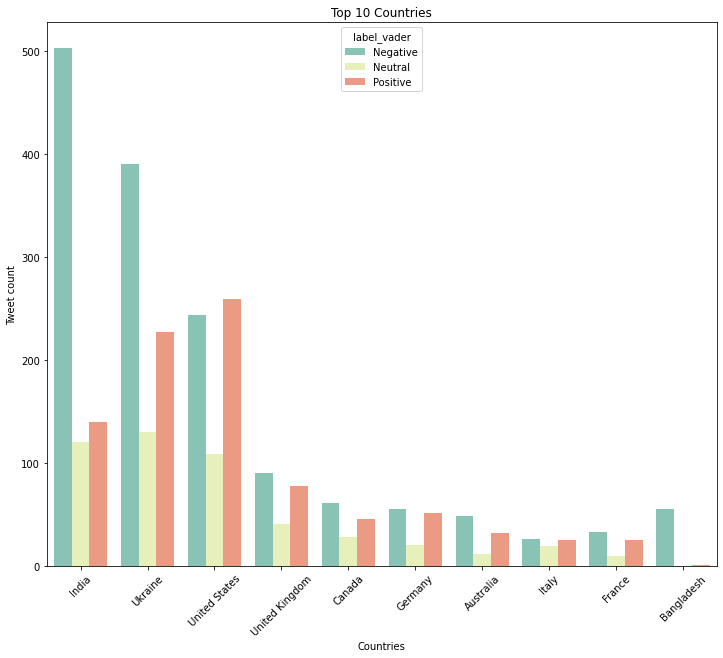

In [ ]:
# Get the positive/negative counts by country --- VADER
positives_by_country = data[data.Country!='unknown'].groupby("label_vader")["Country"].value_counts().Negative.sort_values(ascending=False)
negatives_by_country =data[data.Country!='unknown'].groupby("label_vader")["Country"].value_counts().Positive.sort_values(ascending=False)

# Print them out
print("Positive \n")
print(positives_by_country)
print("\nNegative\n")
print(negatives_by_country)

# Create a mask for top 1 countries (by tweets count)
mask = data["Country"].isin(top_countries.index[:10]).values

# Create a new DataFrame only includes top10 country
top_20df = data.iloc[mask,:]

# Visualize the top 20 countries
# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="Country", hue = 'label_vader', data=top_20df,palette= ["#7fcdbb", "#edf8b1", "#fc9272"] , order=top_20df["Country"].value_counts().index)
plt.xlabel("Countries")
locs, labels = plt.xticks()
plt.xticks(locs, country_fullnames[:10])
plt.xticks(rotation=45)
plt.ylabel("Tweet count")
plt.title("Top 10 Countries")
plt.show()

Positive 

Country
UA    138
IN    127
US    108
BD     53
GB     45
     ... 
BG      1
AQ      1
AL      1
AD      1
ZW      1
Name: Country, Length: 84, dtype: int64

Negative

Country
IN    212
US    207
UA    204
GB     98
CA     56
     ... 
BF      1
BD      1
BA      1
AZ      1
TW      1
Name: Country, Length: 97, dtype: int64


<Figure size 864x720 with 0 Axes>

Text(0.5, 0, 'Countries')

([<matplotlib.axis.XTick at 0x7f6bdd0e6190>,
 [Text(0, 0, 'India'),
  Text(0, 0, 'Ukraine'),
  Text(0, 0, 'United States'),
  Text(0, 0, 'United Kingdom'),
  Text(0, 0, 'Canada'),
  Text(0, 0, 'Germany'),
  Text(0, 0, 'Australia'),
  Text(0, 0, 'Italy'),
  Text(0, 0, 'France'),
  Text(0, 0, 'Bangladesh')])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Tweet count')

Text(0.5, 1.0, 'Top 10 Countries')

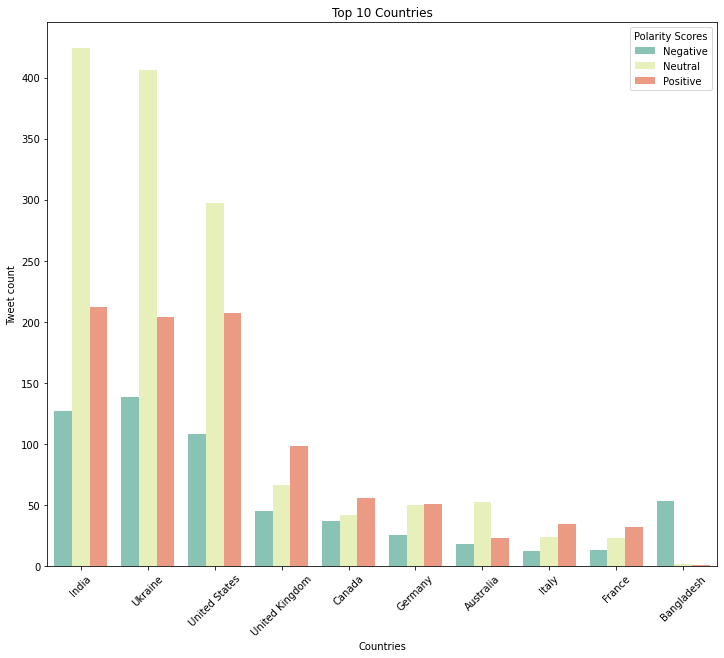

In [ ]:
# Get the positive/negative counts by country--- Textblob
positives_by_country = data[data.Country!='unknown'].groupby("Polarity Scores")["Country"].value_counts().Negative.sort_values(ascending=False)
negatives_by_country =data[data.Country!='unknown'].groupby("Polarity Scores")["Country"].value_counts().Positive.sort_values(ascending=False)

# Print them out
print("Positive \n")
print(positives_by_country)
print("\nNegative\n")
print(negatives_by_country)

# Create a mask for top 1 countries (by tweets count)
mask = data["Country"].isin(top_countries.index[:10]).values

# Create a new DataFrame only includes top10 country
top_20df = data.iloc[mask,:]

# Visualize the top 20 countries
# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="Country", hue="Polarity Scores", data=top_20df,palette= ["#7fcdbb", "#edf8b1", "#fc9272"] ,order=top_20df["Country"].value_counts().index)
plt.xlabel("Countries")
locs, labels = plt.xticks()
plt.xticks(locs, country_fullnames[:10])
plt.xticks(rotation=45)
plt.ylabel("Tweet count")
plt.title("Top 10 Countries")
plt.show()

In [ ]:
data.head()

file_name = "sentiment_labels"+".csv"

data.to_csv(file_name)

,location,text,hashtags,text_vader,preprocess_data,Compound,Positive,Negative,Neutral,label_vader,flair_label,Polarity,Subjectivity,Polarity Scores,Country
0,NaN,russian artillery entered a battle with McDona...,[],russian artillery entered a battle with McDona...,russian aillery entered a battle with mcdonald...,-0.8020,0.000,0.427,0.573,Negative,Negative,0.00,0.0,Neutral,unknown
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",Shades of grey #War #MausMusings #Kharkiv #Ukr...,shades of grey,-0.5719,0.119,0.386,0.495,Negative,Negative,-0.05,0.1,Negative,IN
2,NaN,1.) You are embedded with the âKrakenâ win...,[],1.) You are embedded with the âKrakenâ win...,1 you are embedded with the kraken wing of azo...,0.1280,0.122,0.092,0.786,Positive,Negative,0.00,0.0,Neutral,unknown
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],"In Kharkiv, after shelling in Saltivka, two hi...",in kharkiv after shelling in saltivka two high...,-0.0772,0.093,0.107,0.800,Negative,Negative,0.00,0.0,Neutral,unknown
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",The activities carried out by the United State...,the activities carried out by the united state...,-0.0772,0.067,0.074,0.859,Negative,Negative,-0.35,0.5,Negative,unknown
